In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import  math as m
import seaborn as sns
from datetime import datetime
import linearRegression as lr
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
import sklearn


In [40]:
#reading the csv file
Air = pd.read_excel('AirQualityUCI.xlsx')

## Exploratory Data Analysis

In [41]:
Air.head()


,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


In [42]:
Air.tail()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
9352,2005-04-04,10:00:00,3.1,1314.25,-200,13.529605,1101.25,471.7,538.50,189.8,1374.25,1728.50,21.850,29.250,0.756824
9353,2005-04-04,11:00:00,2.4,1162.50,-200,11.355157,1027.00,353.3,603.75,179.2,1263.50,1269.00,24.325,23.725,0.711864
9354,2005-04-04,12:00:00,2.4,1142.00,-200,12.374538,1062.50,293.0,603.25,174.7,1240.75,1092.00,26.900,18.350,0.640649
9355,2005-04-04,13:00:00,2.1,1002.50,-200,9.547187,960.50,234.5,701.50,155.7,1041.00,769.75,28.325,13.550,0.513866
9356,2005-04-04,14:00:00,2.2,1070.75,-200,11.932060,1047.25,265.2,654.00,167.7,1128.50,816.00,28.500,13.125,0.502804


In [43]:
Air.corr()
#print only numerical columns

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
CO(GT),1.000000,0.041415,0.128351,-0.031377,0.029939,0.526450,-0.089981,0.671140,-0.073721,0.080316,-0.068952,-0.048231,-0.045892
PT08.S1(CO),0.041415,1.000000,0.170009,0.852659,0.933101,0.278029,0.086931,0.154058,0.845133,0.892436,0.754806,0.745344,0.764866
NMHC(GT),0.128351,0.170009,1.000000,0.037329,0.110097,-0.004413,0.048832,0.103345,0.162689,0.101189,-0.000008,0.008288,0.012500
C6H6(GT),-0.031377,0.852659,0.037329,1.000000,0.767401,-0.001163,0.512154,-0.010971,0.774649,0.641306,0.971370,0.925068,0.984556
PT08.S2(NMHC),0.029939,0.933101,0.110097,0.767401,1.000000,0.331331,-0.073748,0.176569,0.874761,0.909909,0.668984,0.585775,0.646535
NOx(GT),0.526450,0.278029,-0.004413,-0.001163,0.331331,1.000000,-0.436083,0.817138,0.035580,0.461916,-0.138457,-0.053008,-0.095841
PT08.S3(NOx),-0.089981,0.086931,0.048832,0.512154,-0.073748,-0.436083,1.000000,-0.256217,0.122672,-0.208935,0.588061,0.573513,0.621576
NO2(GT),0.671140,0.154058,0.103345,-0.010971,0.176569,0.817138,-0.256217,1.000000,-0.022092,0.253469,-0.084084,-0.081300,-0.060423
PT08.S4(NO2),-0.073721,0.845133,0.162689,0.774649,0.874761,0.035580,0.122672,-0.022092,1.000000,0.723670,0.755053,0.640685,0.691889
PT08.S5(O3),0.080316,0.892436,0.101189,0.641306,0.909909,0.461916,-0.208935,0.253469,0.723670,1.000000,0.503659,0.524922,0.519432


In [44]:
Air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9357 non-null   datetime64[ns]
 1   Time           9357 non-null   object        
 2   CO(GT)         9357 non-null   float64       
 3   PT08.S1(CO)    9357 non-null   float64       
 4   NMHC(GT)       9357 non-null   int64         
 5   C6H6(GT)       9357 non-null   float64       
 6   PT08.S2(NMHC)  9357 non-null   float64       
 7   NOx(GT)        9357 non-null   float64       
 8   PT08.S3(NOx)   9357 non-null   float64       
 9   NO2(GT)        9357 non-null   float64       
 10  PT08.S4(NO2)   9357 non-null   float64       
 11  PT08.S5(O3)    9357 non-null   float64       
 12  T              9357 non-null   float64       
 13  RH             9357 non-null   float64       
 14  AH             9357 non-null   float64       
dtypes: datetime64[ns](1),

In [45]:
Air.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,-34.207524,1048.869652,-159.090093,1.865576,894.475963,168.604200,794.872333,58.135898,1391.363266,974.951534,9.776600,39.483611,-6.837604
std,77.657170,329.817015,139.789093,41.380154,342.315902,257.424561,321.977031,126.931428,467.192382,456.922728,43.203438,51.215645,38.976670
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,0.600000,921.000000,-200.000000,4.004958,711.000000,50.000000,637.000000,53.000000,1184.750000,699.750000,10.950000,34.050000,0.692275
50%,1.500000,1052.500000,-200.000000,7.886653,894.500000,141.000000,794.250000,96.000000,1445.500000,942.000000,17.200000,48.550000,0.976823
75%,2.600000,1221.250000,-200.000000,13.636091,1104.750000,284.200000,960.250000,133.000000,1662.000000,1255.250000,24.075000,61.875000,1.296223
max,11.900000,2039.750000,1189.000000,63.741476,2214.000000,1479.000000,2682.750000,339.700000,2775.000000,2522.750000,44.600000,88.725000,2.231036


In [46]:
Air.shape

(9357, 15)

In [47]:
Air['Time'] = pd.to_datetime(Air['Time'],format= '%H:%M:%S').dt.hour

In [48]:
Air.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2004-03-10,19,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2004-03-10,20,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2004-03-10,21,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,2004-03-10,22,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


In [49]:
Air['Date']=pd.to_datetime(Air['Date'],format='%y-%m-%d')
Air['Month_name']=Air['Date'].dt.month_name()
Air.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Month_name
0,2004-03-10,18,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754,March
1,2004-03-10,19,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487,March
2,2004-03-10,20,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239,March
3,2004-03-10,21,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713,March
4,2004-03-10,22,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794,March


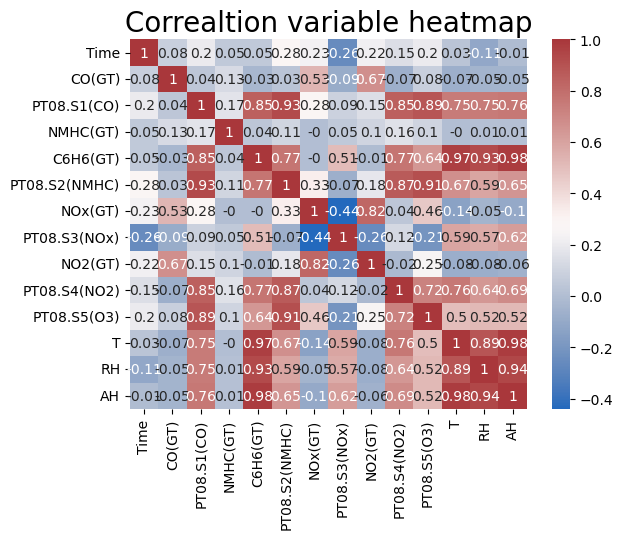

In [50]:
Air.corr().round(2)
sns.heatmap(Air.corr().round(2),annot=True, cmap='vlag',)
plt.title('Correaltion variable heatmap',fontsize=20)
plt.show()

In [51]:
mat=Air.corr().round(2)
mask = np.triu(np.ones_like(mat, dtype=bool))
mask

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False, False, False,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False, False, False, False,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False, False, False, False, False,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False, False, False, False, False, False,  True,
         

<AxesSubplot:>

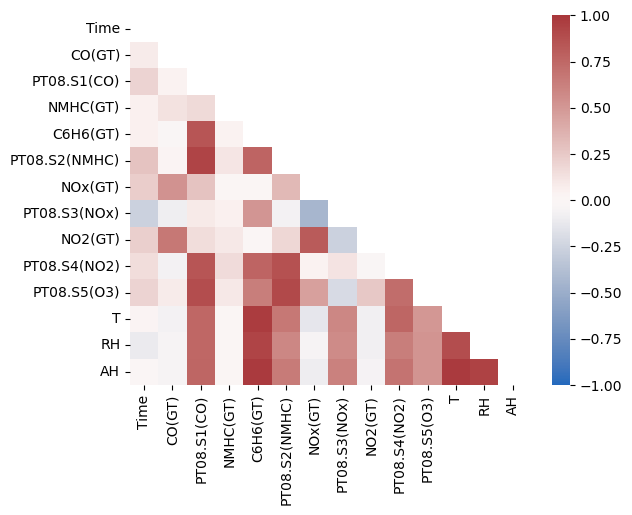

In [52]:
sns.heatmap(Air.corr().round(2),vmin=-1,vmax=1, cmap='vlag',mask=mask)

## Normalization using sklearn

In [53]:
array = Air.to_numpy()

In [54]:
X = array[:,2:14]
Y = array[:,14]
z=array[:,15].T 
for i in X:
    j=0;
    i=np.append(i,z[j])
    j+=1;

In [55]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.1,train_size=0.9, random_state=42)

In [56]:
scaler = sklearn.preprocessing.StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [57]:
X_train

array([[-2.12619071, -0.34484045, -0.29228912, ..., -0.8900057 ,
         0.55023338, -0.20191756],
       [ 0.4489883 , -0.32216457, -0.29228912, ..., -0.42993527,
         0.14254756,  0.27991071],
       [ 0.49137279,  0.53271603, -0.29228912, ...,  2.02906184,
         0.38597068, -0.25141048],
       ...,
       [ 0.48880404,  1.18653718, -0.29228912, ...,  1.05312172,
         0.29837669,  0.42790429],
       [ 0.49394155,  1.11775368,  5.08359817, ...,  0.97215807,
         0.21844958, -0.07187728],
       [ 0.49137279,  1.16008199, -0.29228912, ...,  1.4820102 ,
         0.08389601,  0.32697754]])

In [58]:
X_test

array([[ 0.45926333, -0.3478639 , -0.29228912, ..., -0.57818627,
         0.37485373, -0.08740448],
       [-2.12619071, -0.4650226 , -0.29228912, ..., -0.45017618,
         0.30757694,  0.20421564],
       [ 0.47596025,  0.53800707, -0.29228912, ...,  0.97379923,
         0.35530322, -0.13786787],
       ...,
       [ 0.46825398, -0.04929817, -0.29228912, ..., -0.29262531,
         0.59968468, -0.39746317],
       [ 0.47467587,  0.31729519,  3.17812869, ...,  0.48199981,
         0.23512503, -0.03014797],
       [ 0.45027268, -0.57764613, -0.29228912, ..., -0.60772705,
         0.31907724,  0.22119851]])

In [59]:
print('Training data size:',X_train.shape)
print('Test data size:',X_test.shape)

Training data size: (8421, 12)
Test data size: (936, 12)


## Fit using Gradient descent 

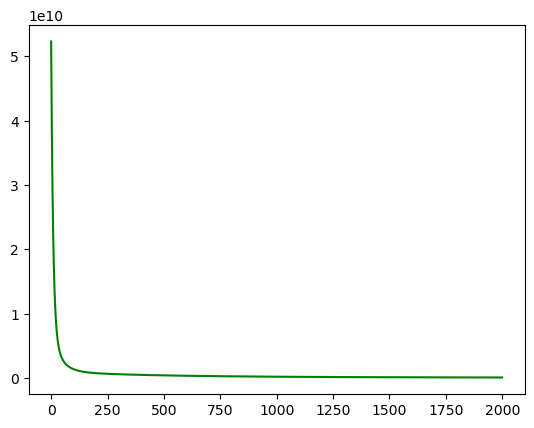

In [66]:
theta1 = lr.fitGrD(X_train,Y_train,0.01,0,1,2000)

In [61]:
m,n=np.shape(X_train)
y_predict_train=np.zeros(m)
b=theta1[0]
w=theta1[1:]
for i in range(m):
    y_predict_train[i]=np.dot(w,X_train[i])+b
error=0
for i in range(m):
    error=error+(y_predict_train[i]-Y_train[i])**2
error=error/(2*m)
print("Training Set error:{}".format(error))

Training Set error:1.6241230330402627


In [62]:
tr=np.shape(X_test)[0]
y_predict_test=np.zeros(tr)
for i in range(tr):
    y_predict_test[i]=np.dot(w,X_test[i])+b
error_test=0
for i in range(tr):
    error_test=error_test+(y_predict_test[i]-Y_test[i])**2
error_test=error_test/(2*tr)
print("Test Set error:{}".format(error_test))

Test Set error:1.57025090948795


## Normal fit

In [63]:
theta_n=lr.fitNormal(X_train,Y_train)

In [64]:
m=len(X_train)
y_predict_train_n=np.zeros(m)
for i in range(m):
    y_predict_train_n[i]=np.dot(theta_n,X_train[i])
error_n=0
for i in range(m):
    error_n=error_n+(y_predict_train_n[i]-Y_train[i])**2
error_n=error_n/(2*m)
print("Training Set error using Normal Equations:{}".format(error_n))

Training Set error using Normal Equations:24.643298493394624


In [65]:
tr = len(X_test)
y_predict_test_n=np.zeros(tr)
for i in range(tr):
    y_predict_test_n[i]=np.dot(theta_n,X_test[i])
error_test_n=0
for i in range(tr):
    error_test_n=error_test_n+(y_predict_test_n[i]-Y_test[i])**2
error_test_n=error_test_n/(2*tr)
print("Test Set error using Normal Equations:{}".format(error_test_n))

Test Set error using Normal Equations:24.948140873537252
